<a href="https://colab.research.google.com/github/roROHITg/Football-Player-data-Comparison/blob/main/CB_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplsoccer

In [2]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import Radar, add_image, FontManager, grid

In [3]:
URL = "https://play-lh.googleusercontent.com/LgkK2h2UudqIyYaU9PlR-djjiWx9sNfXLv2QkQTURHqGzhFTO539u5AGaJaX88d2_P4"
isl = Image.open(urlopen(URL))

In [8]:
# parameter names of the statistics we want to show
params = [
    'Tackles won', 'Tackles won %', 'Duels won', 'Duels won %',
    'Aerial duels won', 'Aerial duels won %', 'Interceptions',
    'Recoveries', 'Dribbled past', 'Successful passes',
    'Long ball accuracy', 'Goals'
]

# The lower and upper boundaries for the statistics
low = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Upper boundaries (You may want to set realistic upper limits based on the nature of the metrics)
high = [2, 100, 5, 100, 5, 100, 5, 10, 2, 100, 100, 10]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Miscontrol']

In [9]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)

              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [10]:
Player1 = [0.48, 100, 3.03, 48.7, 2.39, 55.6, 0.80, 4.62, 0.48, 42.05, 61.4, 0.48]
Player2 = [0.40, 80.0, 3.00, 52.6, 2.10, 63.6, 1.30, 4.90, 0.10, 34.60, 51.8, 0.00]
Player3 = [1.00, 60.0, 3.89, 66.0, 1.67, 71.4, 1.22, 3.56, 0.56, 31.15, 42.9, 0.11]

Text(0.9, 0.1, 'Data: Opta\nTwitter: @Rohit_speaking')

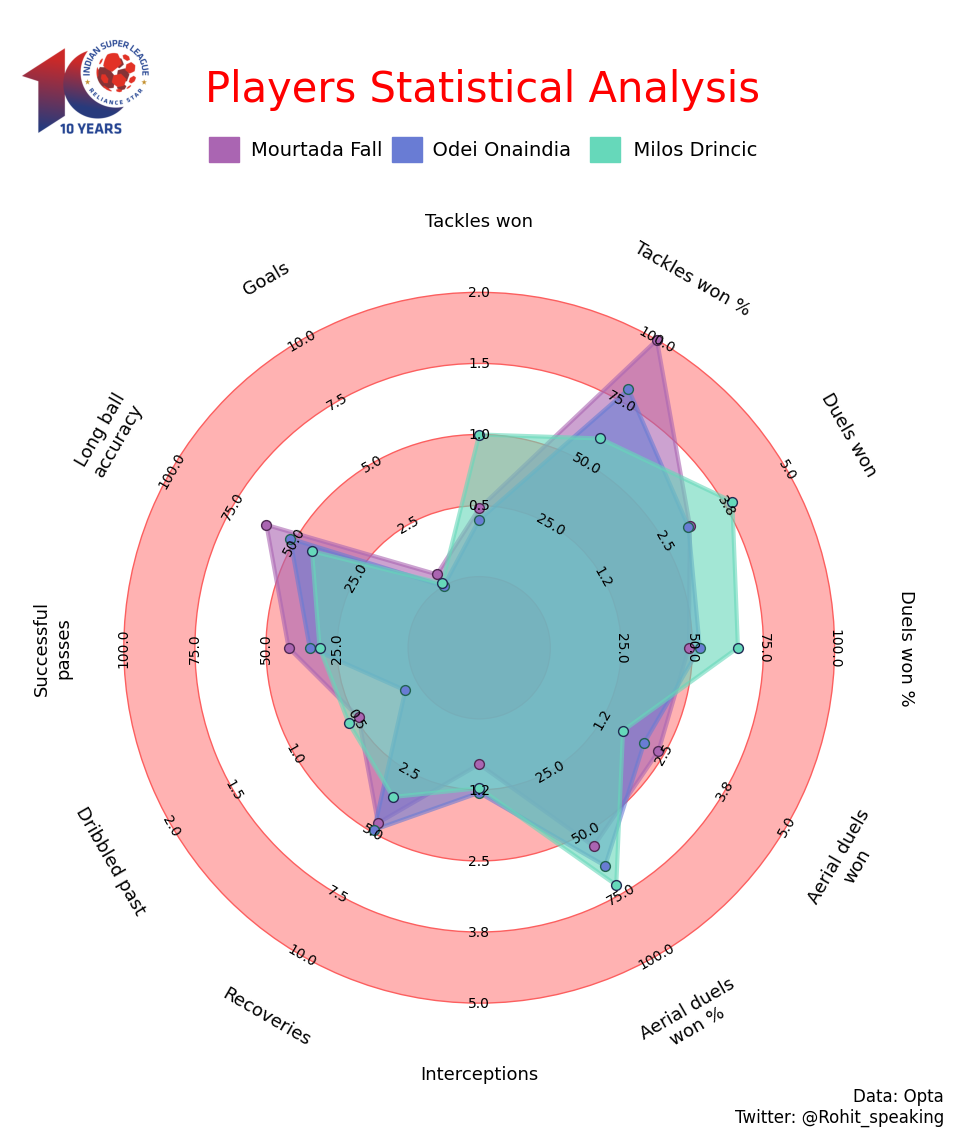

In [22]:
# plot radar
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')

radar1, vertices1 = radar.draw_radar_solid(Player1, ax=ax,
                                           kwargs={'facecolor': '#aa65b2',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#aa65b2',
                                                   'lw': 3})

radar2, vertices2 = radar.draw_radar_solid(Player2, ax=ax,
                                           kwargs={'facecolor': '#697cd4',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#697cd4',
                                                   'lw': 3})

radar3, vertices3 = radar.draw_radar_solid(Player3, ax=ax,
                                           kwargs={'facecolor': '#66d8ba',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#66d8ba',
                                                   'lw': 3})



ax.scatter(vertices1[:, 0], vertices1[:, 1],
           c='#aa65b2', edgecolors='#502a54', marker='o', s=50, zorder=2)
ax.scatter(vertices2[:, 0], vertices2[:, 1],
           c='#697cd4', edgecolors='#216352', marker='o', s=50, zorder=2)
ax.scatter(vertices3[:, 0], vertices3[:, 1],
           c='#66d8ba', edgecolors='#222b54', marker='o', s=50, zorder=2)


range_labels = radar.draw_range_labels(ax=ax, fontsize=10)
param_labels = radar.draw_param_labels(ax=ax, fontsize=13)


# add title
fig.text(
    0.515, 0.95, "Players Statistical Analysis", size=30,
    ha="center", color="Red"
)
# add text
fig.text(
    0.322, 0.905, "Mourtada Fall        Odei Onaindia          Milos Drincic", size=14,
     color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.287, 0.9), 0.025, 0.021, fill=True, color="#aa65b2",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.44, 0.9), 0.025, 0.021, fill=True, color="#697cd4",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.605, 0.9), 0.025, 0.021, fill=True, color="#66d8ba",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    isl, fig, left=0.12, bottom=0.9, width=0.13, height=0.127
)   # these values might differ when you are plotting


# add credits
CREDIT_1 = "Data: Opta"
CREDIT_2 = "Twitter: @Rohit_speaking"

fig.text(
    0.90, 0.1, f"{CREDIT_1}\n{CREDIT_2}", size=12,
    color="#000000",
    ha="right"
)